<a href="https://colab.research.google.com/github/deeplearning-itba/NLP-Embeddings/blob/master/06_glove_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

Agregar este archivo a la carpeta de google drive clickeando en el link y clickeando el '+' arriba a la derecha

https://drive.google.com/open?id=1jJ20oNZIysi-V-iORAE0eEZq4LhuWxUW

In [0]:
import codecs
import numpy as np

In [4]:
! wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-10-17 15:14:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-10-17 15:14:22--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-10-17 15:14:23--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [5]:
! unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
# EMBEDDING_DIR = "/content/drive/My Drive/ITBA/Lab-NLP/Embeddings/glove/"
EMBEDDING_DIR = "./"


In [0]:
def load_embeddings(file, embed_dim=100):
  #load embeddings

  print('loading word embeddings...')
  embeddings_index = {}
  f = codecs.open(EMBEDDING_DIR+'glove.6B.100d.txt', encoding='utf-8')
  for line in f:
      values = line.rstrip().rsplit(' ')
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
  f.close()
  print('found %s word vectors' % len(embeddings_index))
  return embeddings_index

In [103]:
# embeddings_index = load_embeddings(EMBEDDING_DIR+'glove.6B.300d.txt', embed_dim=300)
embeddings_index = load_embeddings(EMBEDDING_DIR+'glove.6B.100d.txt')

loading word embeddings...
found 400000 word vectors


In [0]:
matrix_word_vectors = np.array(list(embeddings_index.values()))
vocab_list = np.array(list(embeddings_index.keys()))

In [0]:
from sklearn.neighbors import NearestNeighbors

In [0]:
nearest = NearestNeighbors(n_neighbors=20, metric='cosine')

In [107]:
nearest.fit(matrix_word_vectors)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [0]:
def get_analogy(word1, word2, word3):
  # word1 es a word2 como word3 es a word4
  word4 = embeddings_index[word2] - embeddings_index[word1]  + embeddings_index[word3] 
  return word4

In [0]:
def get_nearests_words(vector):
  distances, nearest_indexes = nearest.kneighbors(vector.reshape(1, -1))
  words_list = []
  for idx in nearest_indexes[0]:
    words_list.append(vocab_list[idx])
  return words_list

In [162]:
# woman -> man, queen -> ?
# england -> london, france-> ?
# woman -> women, man -> ?
# messi -> soccer, federer -> ?

analogy_vector = get_analogy('switzerland', 'alps', 'argentina')
get_nearests_words(analogy_vector)

['andes',
 'alps',
 'argentina',
 'pyrenees',
 'peru',
 'argentine',
 'foothills',
 'apennines',
 'brazil',
 'portugal',
 'patagonia',
 'portuguese',
 'juniors',
 'chaco',
 'mountains',
 'coast',
 'slopes',
 'paraguay',
 'madeira',
 'pampas']

In [0]:
animals = get_nearests_words(embeddings_index['dog'])

In [0]:
transport = get_nearests_words(embeddings_index['car'])

In [0]:
countries = get_nearests_words(embeddings_index['england'] + embeddings_index['argentina'])

In [0]:
professions = get_nearests_words(embeddings_index['doctor']) + get_nearests_words(embeddings_index['engineer']) \
+ get_nearests_words(embeddings_index['economist'])

In [0]:
all_words = animals + transport + countries + professions

In [0]:
vectors_subset = np.array([embeddings_index[word] for word in all_words])

In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(2, verbose=1)

In [190]:
%time embed_2d_tsne = tsne.fit_transform(vectors_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 2.776161
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.507732
[t-SNE] KL divergence after 1000 iterations: 0.190698
CPU times: user 560 ms, sys: 88.9 ms, total: 649 ms
Wall time: 564 ms


In [0]:
from matplotlib import pyplot as plt

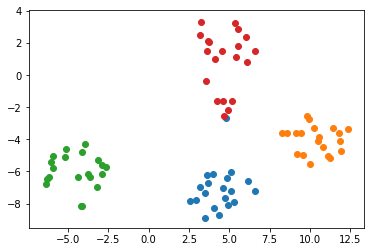

In [194]:
for i in range(4):
  plt.scatter(embed_2d_tsne[i*20:(i+1)*20,0], embed_2d_tsne[i*20:(i+1)*20,1], c=f'C{i}')